# Kettősinga modellezése Sympy segítségével

## Feladatkitűzés
Modellezzünk egy kettősingát adott (ismert) $l_1$ és $l_2$ hosszú rudakkal és végpontjaikra helyezett $m_1$ és $m_2$ nagyságú tömegekkel az alábbi ábárán látható módón: 

<p align="center">
  <img src="fig.png?1" width="400" />
</p>

Könnyen látható, hogy a kettősinga $2$ DoF (szabadsági fokú) rendszert alkot. A mozgást leíró időfüggő koordináták legyenek a $\theta_1(t)$ és $\theta_2(t)$ szögek, szintén az ábra szerinti értelemben. A rendszer kezdeti állapota $\theta_1(0)$, $\theta_2(0)$, $\dot\theta_1(0)$ és $\dot\theta_2(0)$ adott, a kettősingára mozgása során csak a gravitációs erő hat - azaz a rendszert kívülről gerjesztő hatások nem érik, és a súrlódástól is eltekintünk. 

### Levezetés
Az $m_1$ és $m_2$ tömegpontok helyét az x-y koordinátarendszerben, geometriai úton könnyen megkaphatjuk:
$\begin{equation}\begin{bmatrix} x_1 \\ y_1 \end{bmatrix} = \begin{bmatrix} l_1\sin(\theta_1) \\ -l_1\cos(\theta_1) \end{bmatrix}\tag{1.1}\end{equation}$
$\begin{equation}\begin{bmatrix} x_2 \\ y_2 \end{bmatrix} = \begin{bmatrix} l_1\sin(\theta_1)+l_2\sin(\theta_2) \\ -l_1\cos(\theta_1)-l_2\cos(\theta_2) \end{bmatrix}\tag{1.2}\end{equation}$
Ismeretes, hogy a mozgásegyenlet származtatható a *másodfajú Lagrange-egyenlet* alapján, az alábbi módon:
$\begin{equation} \frac{\text{d}}{\text{d}t}\frac{\partial T}{\partial\dot\theta_1}-\frac{\partial T}{\partial\theta_1}+\frac{\partial U}{\partial\theta_1}=0\tag{1.3}\end{equation}$
$\begin{equation} \frac{\text{d}}{\text{d}t}\frac{\partial T}{\partial\dot\theta_2}-\frac{\partial T}{\partial\theta_2}+\frac{\partial U}{\partial\theta_2}=0 \tag{1.4}\end{equation}$
Ahol a rendszer $T$ *kinetikus energiája* és $U$ *potenciális energiája* felírható, mint:
$\begin{equation} T = \frac{1}{2}m_1(\dot x_1^2+\dot y_1^2)+\frac{1}{2}m_2(\dot x_2^2+\dot y_2^2) \tag{1.5}\end{equation}$
$\begin{equation} U = m_1gy_1+m_2gy_2 \tag{1.6}\end{equation}$

## Megoldás

### Szükséges importok a feladatmegoldáshoz

In [1]:
# Feladatmegoldás
import numpy as np                              # Alap matematikai eszköztár
import sympy as sp                              # Szimbolikus levezetés
from scipy.integrate import odeint              # A mozgásegyenletek numerikus megoldása

# Animáció
import matplotlib.pyplot as plt                 # Plotolás        
from matplotlib import animation                # Animálás
from matplotlib.animation import PillowWriter   # .gif formátumba exportálás

### Fizikai mennyiségek definiálása

In [2]:
# Az adatok definiálása
t, g, l_1, l_2, m_1, m_2 = sp.symbols("t g l_1 l_2 m_1 m_2")

# A (keresett) függvények definiálása
θ_1, θ_2 = sp.symbols(r"\theta_1, \theta_2", cls=sp.Function)

# Az időfüggés explicit megadása
θ_1, θ_2 = θ_1(t), θ_2(t)

A levezetéshez szükségünk van az első és második deriváltakra is. A `sp.diff()` függvény segítségével származtathatjuk a deriváltakat az alábbi módon:

In [3]:
θ_1d = sp.diff(θ_1, t)
θ_2d = sp.diff(θ_2, t)
θ_1dd = sp.diff(θ_1d, t)
θ_2dd = sp.diff(θ_2d, t)

### A mozgásegyenlet felírása Sympy segítségével (levezetés)

Az (1.1) és (1.2) egyenletek alapján fel tudjuk írni az (abszolút) x-y koordinátarendszerben a tömegpontok ($m_1$, $m_2$) helyét:
$\begin{equation}\begin{bmatrix} x_1 \\ y_1 \end{bmatrix} = \begin{bmatrix} l_1\sin(\theta_1) \\ -l_1\cos(\theta_1) \end{bmatrix}\tag{1.1}\end{equation}$
$\begin{equation}\begin{bmatrix} x_2 \\ y_2 \end{bmatrix} = \begin{bmatrix} l_1\sin(\theta_1)+l_2\sin(\theta_2) \\ -l_1\cos(\theta_1)-l_2\cos(\theta_2) \end{bmatrix}\tag{1.2}\end{equation}$

In [4]:
# Az m_1 helye az abszolút koordinátarendszerben
x_1 = l_1*sp.sin(θ_1)
y_1 = -l_1*sp.cos(θ_1)

# Az m_2 helye az abszolút koordinátarendszerben
x_2 = l_1*sp.sin(θ_1)+l_2*sp.sin(θ_2)
y_2 = -l_1*sp.cos(θ_1)-l_2*sp.cos(θ_2)

Az (1.5) és (1.6) egyenletek alapján felírhatjuk a $T$ *kinetikus* és $U$ *potenciális energiákat*:
$\begin{equation} T = \frac{1}{2}m_1(\dot x_1^2+\dot y_1^2)+\frac{1}{2}m_2(\dot x_2^2+\dot y_2^2) \tag{1.5}\end{equation}$
$\begin{equation} U = m_1gy_1+m_2gy_2 \tag{1.6}\end{equation}$

In [5]:
# A kinetikus energia
T_1 = 1/2*m_1*(sp.diff(x_1,t)**2+sp.diff(y_1,t)**2)
T_2 = 1/2*m_2*(sp.diff(x_2,t)**2+sp.diff(y_2,t)**2)
T = T_1+T_2
display(T)

# A potenciális energia
U = m_1*g*y_1+m_2*g*y_2
display(U)

0.5*m_1*(l_1**2*sin(\theta_1(t))**2*Derivative(\theta_1(t), t)**2 + l_1**2*cos(\theta_1(t))**2*Derivative(\theta_1(t), t)**2) + 0.5*m_2*((l_1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + l_2*sin(\theta_2(t))*Derivative(\theta_2(t), t))**2 + (l_1*cos(\theta_1(t))*Derivative(\theta_1(t), t) + l_2*cos(\theta_2(t))*Derivative(\theta_2(t), t))**2)

-g*l_1*m_1*cos(\theta_1(t)) + g*m_2*(-l_1*cos(\theta_1(t)) - l_2*cos(\theta_2(t)))

Ezt követően az (1.3) és (1.4) egyenletekből adódik a mozgásegyenlet:
$\begin{equation} \frac{\text{d}}{\text{d}t}\frac{\partial T}{\partial\dot\theta_1}-\frac{\partial T}{\partial\theta_1}+\frac{\partial U}{\partial\theta_1}=0\tag{1.3}\end{equation}$
$\begin{equation} \frac{\text{d}}{\text{d}t}\frac{\partial T}{\partial\dot\theta_2}-\frac{\partial T}{\partial\theta_2}+\frac{\partial U}{\partial\theta_2}=0 \tag{1.4}\end{equation}$

In [6]:
# Másodfajú Lagrange θ_1-re:
LagEq1 = sp.diff(sp.diff(T,θ_1d),t).simplify() - sp.diff(T, θ_1) + sp.diff(U, θ_1)

# Másodfajú Lagrange θ_2-re:
LagEq2 = sp.diff(sp.diff(T,θ_2d),t).simplify() - sp.diff(T, θ_2) + sp.diff(U, θ_2)

### A mozgásegyenlet numerikus megoldása
Közönséges differenciálegyenletek (ODE) numerikus megoldása során az alábbi eljárást követjük:
1. Rendezzük az egyenleteiket a legmagasabb rendű deriváltra! Jelölje a legnagyobb rendű deriváltat $n$. 
2. Ha $n\neq 1$, azaz legalább másodrendű a differenciálegyenletünk, akkor alkalmazzuk a **Cauchy-átírást**! Ez mindig megtehető és ennek segítségével egy $n$-edrendű ODE átírható $n$ darab, elsőrendű ODE-re. A módszer lényege, hogy az eredeti függvényünk deriváltjaira *bevezetünk új függvényeket*. 
3. A Cacuhy-átírás során kapott ODE-rendszert foglaljuk egy $\vec{S}$ vektorba az egyszerűség kedvéért. (S: system)
4. Írjuk fel a rendszer **kezdeti feltételeit** (IVP)!
5. Végül **numerikus integrálás** segítségével megkapjuk az eredményt. Ezt már fel tudjuk dolgozni, ábrázolni, esetleg animálni.

**1. lépés**: Rendezzük a mozgásegyenleteket az `sp.solve()` függvény segítségével `θ_1dd(t)`-re és `θ_2dd(t)`-re (azaz a második deriváltakra)! Erre a numerikus megoldás során lesz szükségünk. Figyelem: az alábbi szintaxisban feltételezzük, hogy az egyenletek már **nullára redukált** állapotban vannak!

In [7]:
solution = sp.solve([LagEq1, LagEq2], (θ_1dd, θ_2dd), simplify=False, rational=False)

**2. lépés**: Amit most megkaptunk az nem más, mint a második deriváltak:
$$\frac{\text{d}^2\theta_1(t)}{\text{d} t^2} = ... \qquad\qquad\qquad \frac{\text{d}^2\theta_2(t)}{\text{d} t^2} = ... $$
Ami problémát jelent a numerikus eszköztárunkban, hogy a **numerikus integrálást csak elsőrendű differenciálegyenleten lehet elvégezni!** Ami viszont jó hír, hogy a *Cauchy-átírás* segítségével könnyedén előállíthatjuk az elsőrendű egyenleteket. Ehhez vezessünk be új változókat az első deriváltakra:
$$ Q_1 := \frac{\text{d}\theta_1}{dt} \qquad\qquad\qquad Q_2 := \frac{\text{d}\theta_2}{dt}$$
Ezeket tovább deriválva:
$$ \frac{\text{d}}{\text{d}t}Q_1 = \frac{\text{d}^2\theta_1}{\text{d}t^2} = ... \qquad\qquad\qquad \frac{\text{d}}{\text{d}t}Q_2 = \frac{\text{d}^2\theta_2}{\text{d}t^2} = ...$$

Amire még ezen felül szükségünk van, hogy a **szimbolikus egyenleteket átírjuk numerikus egyenletekké** az `sp.lambdify(<argumentum(ok)>, <függvény>)` függvény segítségével. Az úgynevezett *lambda függvények* pusztán csak egy hatékony és gyors megoldást kínálnak arra, hogy numerikusan kiszámítsunk bonyolult összefüggéseket.

In [8]:
# Q1 és Q2 deriváltja
dQ_1n = sp.lambdify((t,g,l_1, l_2, m_1, m_2, θ_1, θ_2, θ_1d, θ_2d), solution[θ_1dd])
dQ_2n = sp.lambdify((t,g,l_1, l_2, m_1, m_2, θ_1, θ_2, θ_1d, θ_2d), solution[θ_2dd])

# θ_1 és θ_2 deriváltja
dθ_1n = sp.lambdify(θ_1d, θ_1d)
dθ_2n = sp.lambdify(θ_2d, θ_2d)

**3. lépés**: Foglaljuk össze egy $\vec{S} = (\theta_1 ,\; Q_1 ,\; \theta_2 ,\; Q_2)$ vektorban a rendszer paramétereit! Ekkor ennek időbeli deriváltja az előzőekben definiált lambda függvényekkel:

In [9]:
def dSdt(S, t, g, l_1, l_2, m_1, m_2):
    θ_1, Q_1, θ_2, Q_2 = S
    return [
        dθ_1n(Q_1),
        dQ_1n(t, g, l_1, l_2, m_1, m_2, θ_1, θ_2, Q_1, Q_2),
        dθ_2n(Q_2),
        dQ_2n(t, g, l_1, l_2, m_1, m_2, θ_1, θ_2, Q_1, Q_2),
    ]

**4-5. lépés**: Ebben a formában már meg tudjuk oldani a mozgásegyenleteket az `odeint(<rendszer>, <kezdeti feltételek>, <paraméterek>)` függvény segítségével!

In [45]:
# Időtartam felosztása "kellően kicsiny" szakaszokra
t = np.linspace(0,20,1001)

# Paraméterek megadása
g = 9.81    # [m/s^2]
l_1 = 2     # [m]
l_2 = 1     # [m]
m_1 = 3     # [kg]
m_2 = 4     # [kg]

# Mozgásegyenlet megoldása adott kezdeti feltételekre
result1 = odeint(dSdt, y0=[1, -3, 1, 4], t=t, args=(g, l_1, l_2, m_1, m_2))
result2 = odeint(dSdt, y0=[1.001, -3, 1, 4], t=t, args=(g, l_1, l_2, m_1, m_2))
result3 = odeint(dSdt, y0=[1.002, -3, 1, 4], t=t, args=(g, l_1, l_2, m_1, m_2))

### Animáció készítése

In [47]:
# Konvertáljuk a globális x-y koordinátarendszerbe a pontokat:
def theta2xy(t, θ_1, θ_2, l_1, l_2):
    return (l_1*np.sin(θ_1), -l_1*np.cos(θ_1),
             l_1*np.sin(θ_1)+l_2*np.sin(θ_2), -l_1*np.cos(θ_1)-l_2*np.cos(θ_2)) 

x_11, y_11, x_21, y_21 = theta2xy(t, result1.T[0], result1.T[2], l_1, l_2)
x_12, y_12, x_22, y_22 = theta2xy(t, result2.T[0], result2.T[2], l_1, l_2)
x_13, y_13, x_23, y_23 = theta2xy(t, result3.T[0], result3.T[2], l_1, l_2)

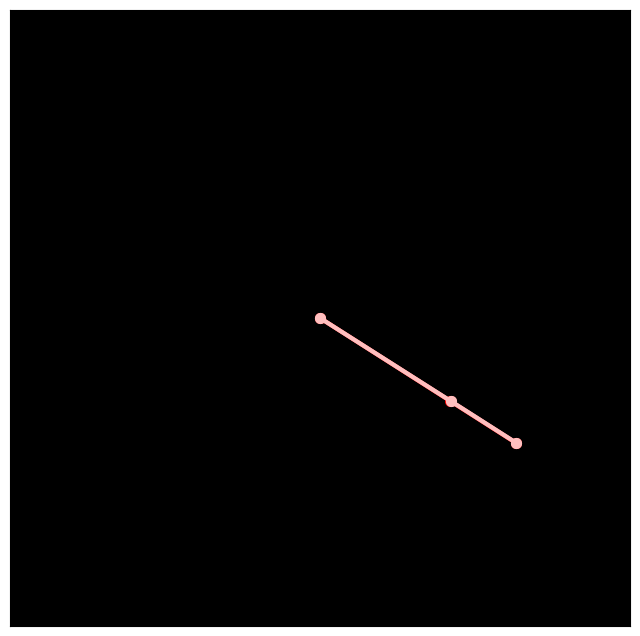

In [48]:
# A kettősingát törött vonalakkal jelenlítjük meg
def animate(i):
    ln1.set_data([0, x_11[i], x_21[i]], [0, y_11[i], y_21[i]])
    ln2.set_data([0, x_12[i], x_22[i]], [0, y_12[i], y_22[i]])
    ln3.set_data([0, x_13[i], x_23[i]], [0, y_13[i], y_23[i]])
    
# Elkészítjük a rajzteret
fig, ax = plt.subplots(1,1, figsize=(8,8))

# Plotolás 
ax.set_facecolor('k')           # Háttérszín: fekete
ax.get_xaxis().set_ticks([])    # x-tengely felirat eltüntetése
ax.get_yaxis().set_ticks([])    # y-tengely felirat eltüntetése
ln1, = plt.plot([], [], 'o-', color = "red", lw=3, markersize=7)            # 1. rendszer
ln2, = plt.plot([], [], 'o-', color = '#ff8484',lw=3, markersize=7)         # 2. rendszer
ln3, = plt.plot([], [], 'o-', color = '#ffbfbf', lw=3, markersize=7)        # 3. rendszer
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)

# Animáció
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('double_prendulum_chaotic.gif', writer='pillow',fps=50)

# Epilógus

Kiegészítés az órai anyaghoz:
- Python dokumentációja: https://docs.python.org/3/
- NumPy dokumentációja: https://numpy.org/doc/1.25/
- SymPy dokumentációja: https://docs.sympy.org/latest/index.html
- MatPlotLib dokumentációja: https://matplotlib.org/stable/index.html

Bármilyen kérdés, kérés vagy probléma esetén keressetek minket az alábbi elérhetőségeken:
- Monori Bence - m.bence02@outlook.hu
- Wenesz Dominik - weneszdominik@gmail.com

Illetve anonim üzenetküldésre is lehetőséget biztosítunk, ezt az alábbi linken tudjátok elérni: https://forms.gle/8LR5QdMf2fCpxtMK7